## Ejercicio 1: Preparar el ambiente de trabajo

## Esteban Gonzalez
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.figsize'] = (20, 20) # Tamaño gráficos
plt.rcParams['figure.dpi'] = 80 # resolución gráficos
plt.style.use('seaborn')

from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam import LinearGAM
from pygam.utils import generate_X_grid

import seaborn as sns

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

## Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [5]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'cement', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag', 'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash', 
                    'Water  (component 4)(kg in a m^3 mixture)': 'water', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine_aggregate', 'Age (day)': 'age', 'Concrete compressive strength(MPa, megapascals) ' : 'concrete_compressive_strength'                   
                   }, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


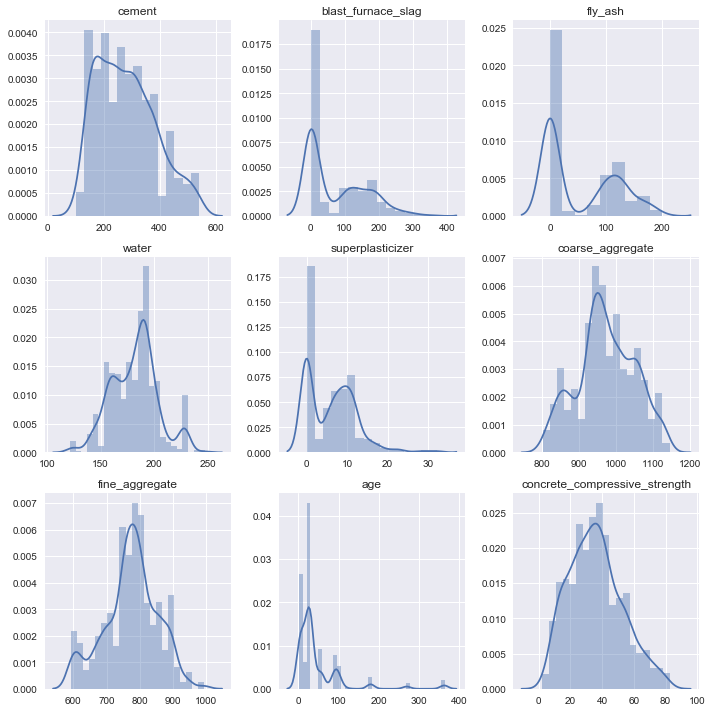

In [7]:
plt.rcParams['figure.figsize'] = (10, 10)
for n, i in enumerate(df):
    plt.subplot(3, 3, n+1)
    if len(df[i].value_counts()) > 2:
        sns.distplot(df[i]).set_title('', size=14);
        plt.title(i)
        plt.xlabel("")
        plt.tight_layout()


## Ejercicio 3: Modelo
- En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función gridsearch . Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.


In [8]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [9]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [10]:
X = df.iloc[:,: -1] 
N = X.shape[0] 
y = df['concrete_compressive_strength'] 
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 63)

### sin grilla

In [11]:
# Creamos el modelo, lo entrenamos y buscamos los hiperparámetros mediante gridsearch
gam = LinearGAM().fit(X_train, y_train)
gam.summary()

C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.3706
Link Function:                     IdentityLink Log Likelihood:                                 -2342.9406
Number of Samples:                          721 AIC:                                             4878.6224
                                                AICc:                                            4908.7161
                                                GCV:                                                0.1202
                                                Scale:                                               0.092
                                                Pseudo R-Squared:                                   0.9221
Feature Function   Data Type      Num

### con grilla

In [12]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}
# Creamos el modelo, lo entrenamos y buscamos los hiperparámetros mediante gridsearch
gam2 = LinearGAM().gridsearch(X_train, y_train, **search_params)
gam2.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:03C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:02C:\

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    107.5145
Link Function:                     IdentityLink Log Likelihood:                                 -2374.4345
Number of Samples:                          721 AIC:                                              4965.898
                                                AICc:                                             5004.767
                                                GCV:                                                0.1205
                                                Scale:                                              0.0887
                                                Pseudo R-Squared:                                   0.9264
Feature Function   Data Type      Num

In [13]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))
report_gam_metrics(gam2, X_test, y_test)

Test R^2 accuracy: 0.898
Test RMSE accuracy: 0.31
Test MAE accuracy: 0.209


In [14]:
report_gam_metrics(gam, X_test, y_test)

Test R^2 accuracy: 0.897
Test RMSE accuracy: 0.311
Test MAE accuracy: 0.216


In [15]:
gam.lam # sin grilla

0.6

In [16]:
gam2.lam # con grilla

0.25118864315095796

## Ejercicio 4: Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
- Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [17]:
# sin grilla
def dependencia_parcial(model, train):
    #matriz para los valores de cada atributo
    x_grid = generate_X_grid(model)
    atributos=train.columns
    #se genera la grilla
    cols=4; rows=np.ceil(len(atributos)/cols)
    #para cada atributo
    for i, n in enumerate(range(len(atributos))):
        plt.subplot(rows, cols, i+1)
        #se extrae la dependencia parcial y los intervalos de confianza al 95%
        partial_dep, confidence_intervals = model.partial_dependence(x_grid, feature=i+1, width=.95)
        #visualizamos la recta
        plt.plot(x_grid[:,n],partial_dep, color='tomato')
        #visualizamos los intervalos de confianza
        plt.fill_between(x_grid[:,n],
                        confidence_intervals[0][:,0],
                        confidence_intervals[0][:,1],
                        color='tomato', alpha=.25)
        #agregamos el nombre de cada atributo
        plt.title(atributos[n])
        plt.plot(train[atributos[n]],
                [plt.ylim()[0]]*len(train[atributos[n]]),
                '|', color='orange', alpha=.5)
    plt.tight_layout()


C:\Users\egonz\Anaconda3\Anaconda3.2\lib\site-packages\numpy\matrixlib\defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


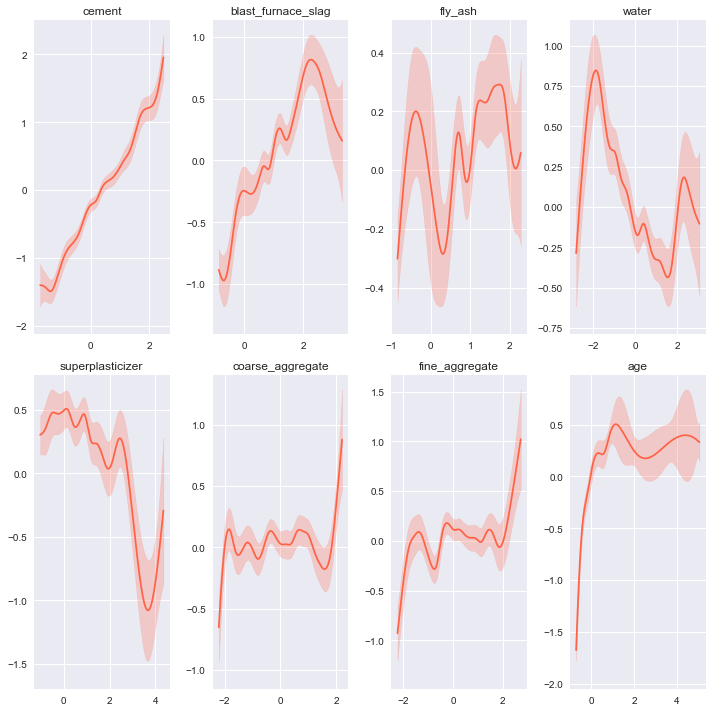

In [18]:
dependencia_parcial(gam,X_train)

In [19]:
#asociados a mayor resistencia en el concreto tenemos cement, blast_Furnance_Slag, Age, Fine Agregate y coarse agregate 
#asociados inversa a la resistencia en el concreto tenemos water, superplasticizer.